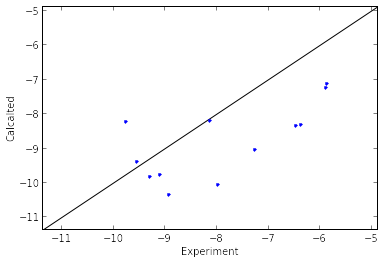

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = 5*np.random.rand(12) - 10

### Scenario 1
#y = 1.0*x - 0.5

### Scenario 2
y = np.random.normal(x,1.0) - 1.0
#x[0] = 0
#y[0] = -12

dmin = np.amin(np.array([np.amin(x),np.amin(y)]))-1
dmax = np.amax(np.array([np.amax(x),np.amax(y)]))+1
plt.axis([dmin, dmax, dmin, dmax])
plt.xlabel('Experiment')
plt.ylabel('Calcalted')
plt.plot([dmin, dmax], [dmin, dmax], 'k-');
plt.plot(x, y, 'b.');


In [2]:
MetricNames = ('Slope', 'Interc', 'R', 'R^2', 'RMSE', 'MSE', 'MUE', 'TAU')
SampleTypes = ('NoUnc.WoutRep', 'LgUnc.WoutRep', 'NoUnc.WRep', 'LgUnc.WRep')
MetricVals = np.zeros([len(SampleTypes),len(MetricNames)], np.float64)
MetricErrs = np.zeros([len(SampleTypes),len(MetricNames)], np.float64)

def bootstrap(x, y, Uncertainty, WithRep):
    BootCyc=10000
    MNames = MetricNames
    MTmp = np.zeros([len(MNames),BootCyc], np.float64)
    MVals = np.zeros([len(MNames)], np.float64)
    MErrs = np.zeros([len(MNames)], np.float64)
    xtmp = np.zeros([len(x)], np.float64)
    ytmp = np.zeros([len(x)], np.float64)
    yfit = np.zeros([len(x)], np.float64)
    plt.figure(figsize=(7, 35))
    plt.subplot(len(MNames)+1,1,1)
    plt.plot([dmin, dmax], [dmin, dmax], 'k-', zorder=2);
    plt.plot(x, y, 'b.', zorder=3);
    plt.xlabel('Experiment')
    plt.ylabel('Calcalted')
    plt.hold(True);

    for b in range(BootCyc):
        for i in range(len(x)):
            # Sample without replacment
            if WithRep == 0:
                j = i 
            # Sample with replacement
            else:
                j = np.random.randint(len(x))
            xtmp[i] = np.random.normal(x[j], 0.00001)  # No uncertainty on experiment
            ytmp[i] = np.random.normal(y[j], Uncertainty+0.00001)  # Prevent failure if 0.0
        # Slope, Intercept, R
        MTmp[0,b], MTmp[1,b], MTmp[2,b], pval, stderr = stats.linregress(xtmp,ytmp)
        # R^2
        MTmp[3,b] = MTmp[2,b]**2
        # RMSE
        MTmp[4,b] = np.sqrt(np.mean(((ytmp - xtmp) ** 2)))
        # MSE
        MTmp[5,b] = np.mean((ytmp - xtmp))
        # MUE
        MTmp[6,b] = np.mean(np.absolute(ytmp - xtmp))
        # Tau
        MTmp[7,b], prob = stats.kendalltau(xtmp,ytmp)
        # Plot bootstraps
        yfit = MTmp[1,b] + MTmp[0,b]*xtmp
        plt.plot(xtmp, yfit, 'r-', alpha=0.05, zorder=1);
    
    for M in range(len(MNames)):
        MVals[M]=np.mean(MTmp[M])
        MErrs[M]=np.std(MTmp[M])
        #print "%12s  %6.2f  (%6.2f)" % (MNames[i],MVals[i],MErrs[i])
        plt.subplot(len(MNames)+1,1,M+2);
        if M == 0 or M == 1 or M == 5:
            plt.hist(MTmp[M], 50);
        if M == 2 or M == 7:
            plt.hist(MTmp[M], 50, range=[-1,1]);
        if M == 3:
            plt.hist(MTmp[M], 50, range=[0,1]);
        if M == 4 or M == 6:
            plt.hist(MTmp[M], 50, range=[0,5]);
        plt.hold(True);
        oldaxis = plt.axis();
        plt.plot([MVals[M],MVals[M]], [0, oldaxis[3]], 'r-');
        plt.xlabel(MNames[M])
        plt.ylabel('Count')
    return (MVals,MErrs)


Sample Type: NoUnc.WoutRep


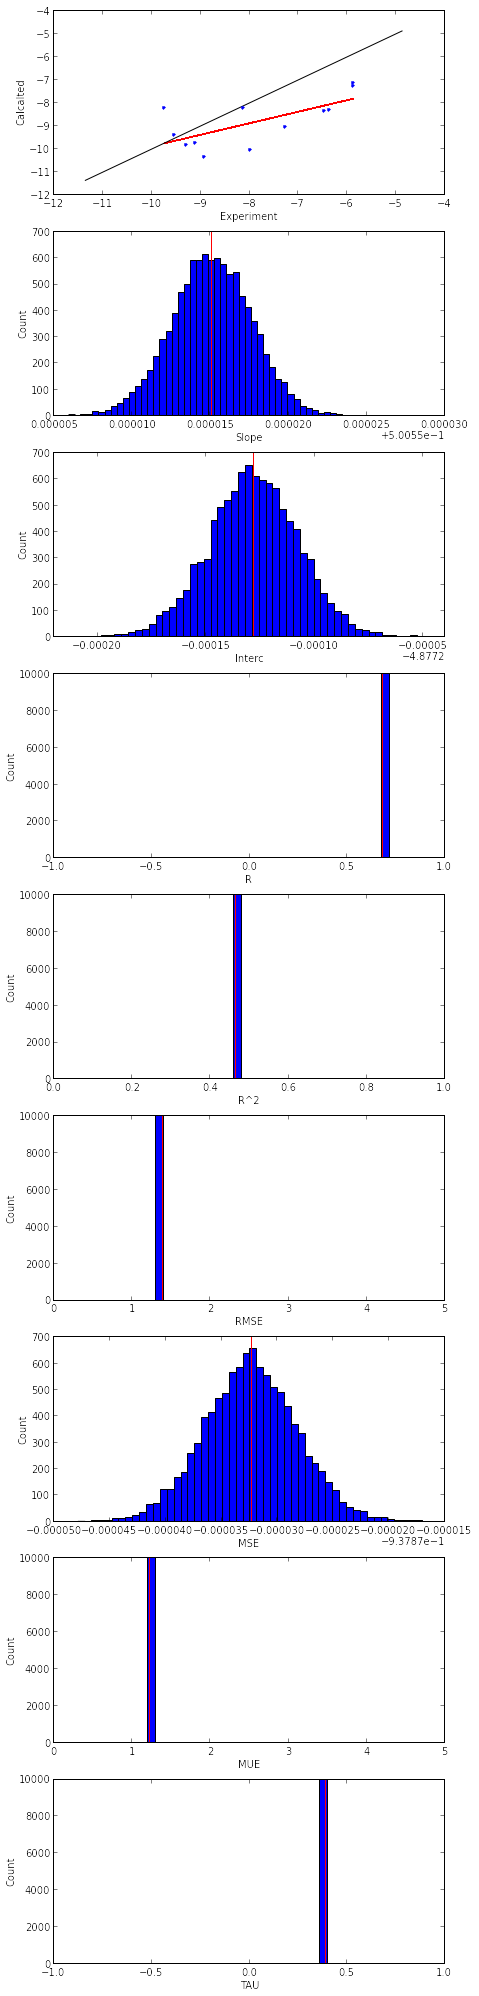

In [3]:
SType=0
print "Sample Type:", SampleTypes[SType]
MetricVals[SType],MetricErrs[SType] = bootstrap(x,y,0,0)

Sample Type: LgUnc.WoutRep


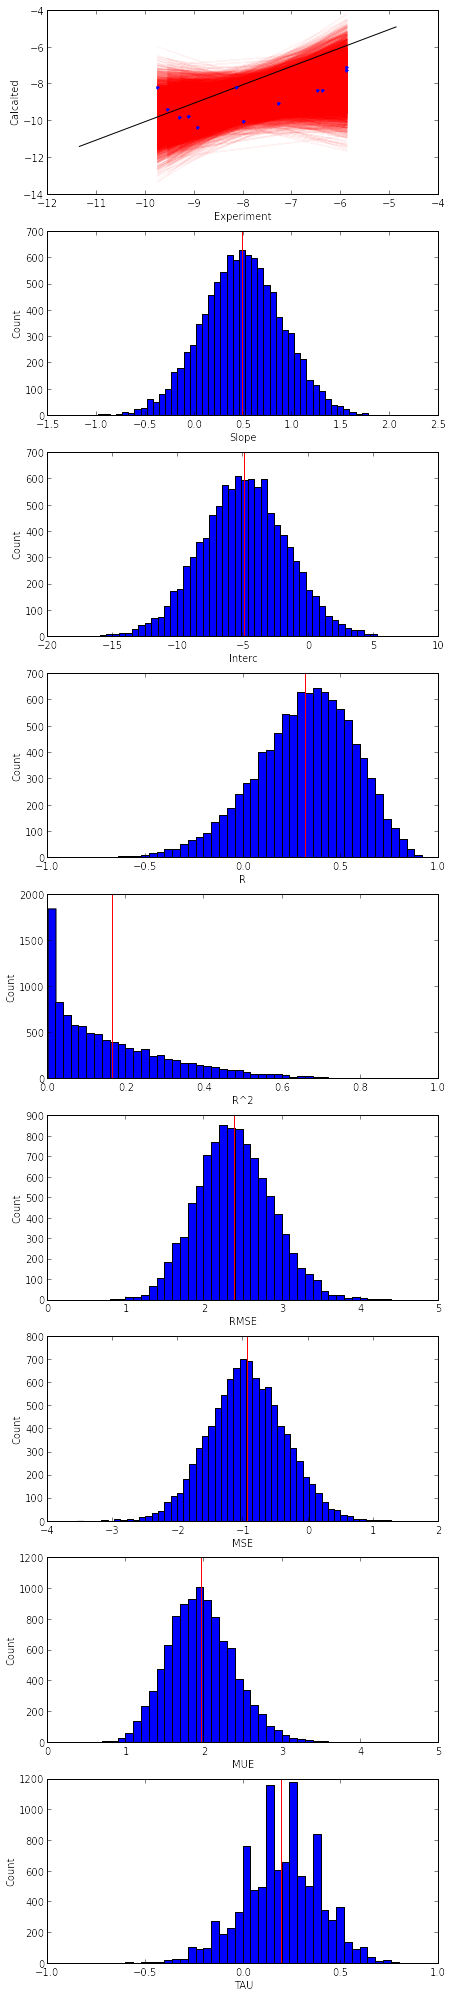

In [4]:
SType=1
print "Sample Type:", SampleTypes[SType]
MetricVals[SType],MetricErrs[SType] = bootstrap(x,y,2,0)

Sample Type: NoUnc.WRep


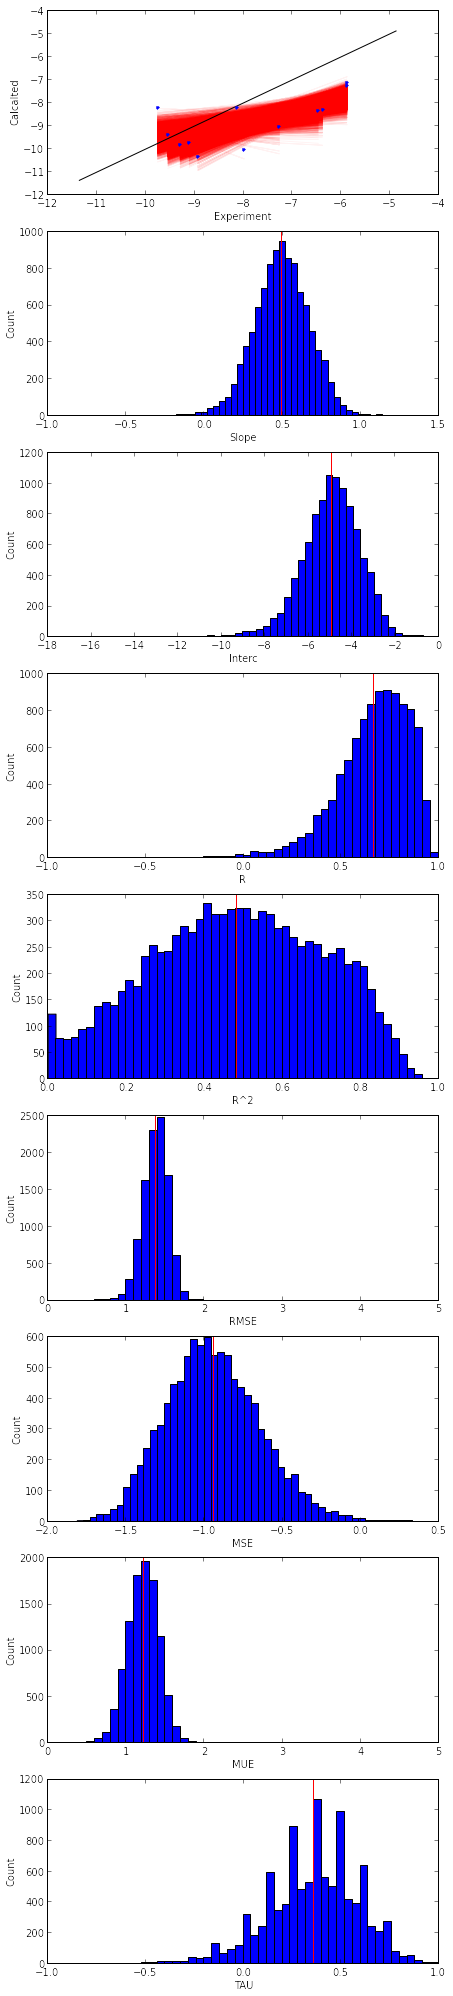

In [5]:
SType=2
print "Sample Type:", SampleTypes[SType]
MetricVals[SType],MetricErrs[SType] = bootstrap(x,y,0,1)

Sample Type: LgUnc.WRep


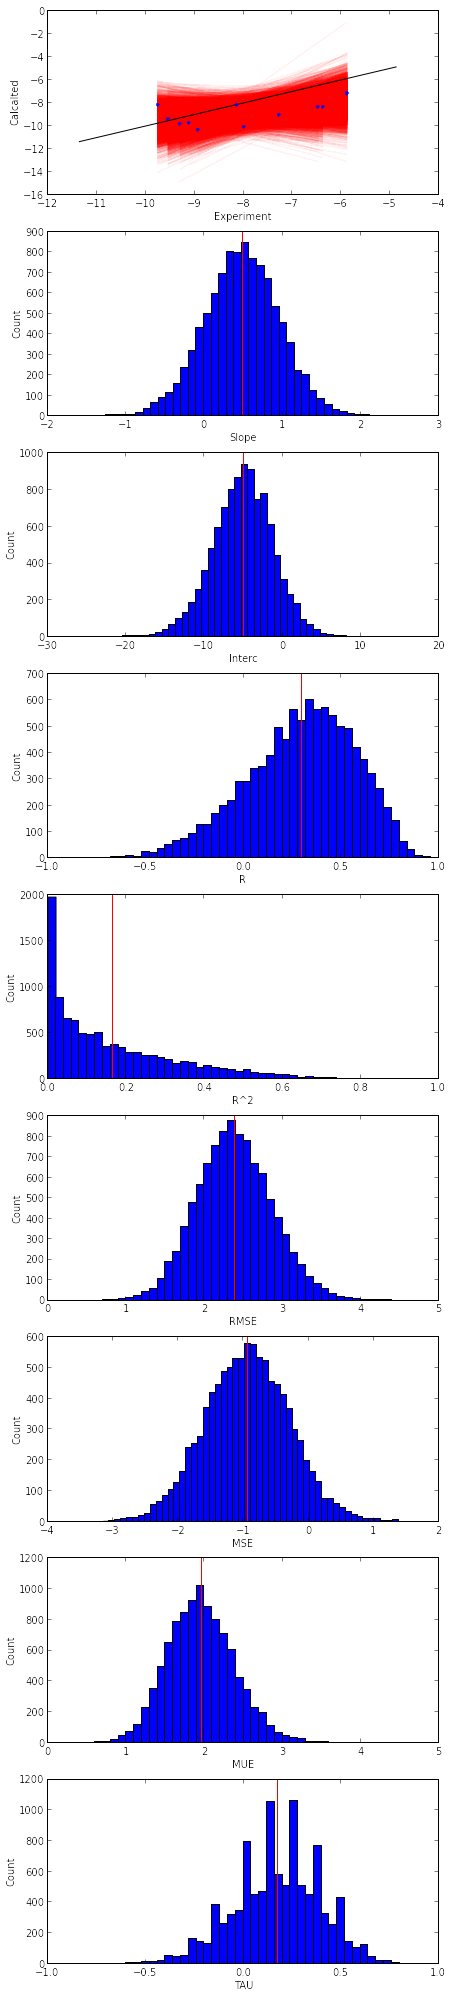

In [6]:
SType=3
print "Sample Type:", SampleTypes[SType]
MetricVals[SType],MetricErrs[SType] = bootstrap(x,y,2,1)

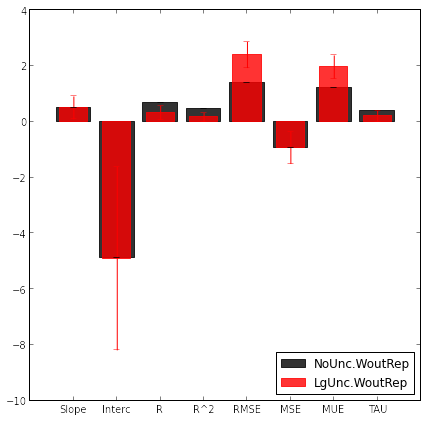

      Metric    NoUnc.WoutRep    LgUnc.WoutRep       NoUnc.WRep       LgUnc.WRep
       Slope  0.50  ( 0.00)     0.50  ( 0.41)     0.50  ( 0.18)     0.49  ( 0.48)    
      Interc -4.88  ( 0.00)    -4.90  ( 3.29)    -4.92  ( 1.33)    -4.99  ( 3.83)    
           R  0.68  ( 0.00)     0.32  ( 0.25)     0.67  ( 0.19)     0.30  ( 0.28)    
         R^2  0.46  ( 0.00)     0.16  ( 0.16)     0.48  ( 0.22)     0.17  ( 0.16)    
        RMSE  1.39  ( 0.00)     2.40  ( 0.47)     1.39  ( 0.15)     2.39  ( 0.48)    
         MSE -0.94  ( 0.00)    -0.93  ( 0.58)    -0.94  ( 0.30)    -0.93  ( 0.64)    
         MUE  1.22  ( 0.00)     1.96  ( 0.41)     1.22  ( 0.19)     1.96  ( 0.42)    
         TAU  0.39  ( 0.00)     0.20  ( 0.20)     0.36  ( 0.23)     0.18  ( 0.22)    


In [7]:
plt.figure(figsize=(7,7))
xpos = np.arange(len(MetricNames))
plt.bar(xpos, MetricVals[0], yerr=MetricErrs[0], color='k', ecolor='k', edgecolor='k',
        align='center', alpha=0.8, zorder=1, width=0.8, label=SampleTypes[0])
plt.bar(xpos, MetricVals[1], yerr=MetricErrs[1], color='r', ecolor='r', edgecolor='r',
        align='center', alpha=0.8, zorder=2, width=0.65, label=SampleTypes[1])
#plt.bar(xpos, MetricVals[2], yerr=MetricErrs[2], color='g', ecolor='g', edgecolor='g',
#        align='center', alpha=0.6, zorder=3, width=0.5, label=SampleTypes[2])
#plt.bar(xpos, MetricVals[3], yerr=MetricErrs[3], color='b', ecolor='b', edgecolor='b',
#        align='center', alpha=0.4, zorder=4, width=0.35, label=SampleTypes[3])

plt.xticks(xpos, MetricNames)
plt.legend(loc='lower right')
plt.show()

print "%12s %16s %16s %16s %16s" % (('Metric',)+SampleTypes)
for i in range(len(MetricNames)):
    print "%12s" % MetricNames[i],
    for SampleType in range(len(SampleTypes)):
        print "%5.2f  (%5.2f)   " % (MetricVals[SampleType,i],MetricErrs[SampleType,i]),
    print ''